# Exercise 8

## Car Price Prediction

Predict if the price of a car is low or high

### Angela Fernanda Romero Fonseca - 201819276
### Carolina Padilla Hernández -201111402
### Juan Camilo Florez Caro - 201620135
### Juan Fernando Ortiz Serrano- 200623117

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics



In [3]:
data = pd.read_csv('dataTrain_carListings.zip')
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int) #Modelo de clasificación
data = data.drop(['Model', 'Price'], axis=1)

data.head()

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice
15,2016,29242,0,0,0,0,1,0,0,1
47,2015,26465,0,0,0,0,1,0,0,1
85,2012,46739,0,1,0,0,0,0,0,1
141,2017,41722,0,0,0,0,0,1,0,1
226,2014,77669,0,0,0,0,0,0,1,0


In [5]:
data.shape

(13150, 10)

In [6]:
y = data['HighPrice'] 
X = data.drop(['HighPrice'], axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [8]:
y_test

332784    1
146436    1
130476    1
85618     1
75474     0
330419    0
205915    1
2836      0
250833    1
126784    0
70347     1
63289     1
112205    1
110630    1
458256    1
371230    0
130467    0
457797    1
367064    0
131705    1
484284    0
482990    0
294535    0
365460    0
64466     1
356183    0
332219    0
480099    1
250250    1
116789    0
         ..
320236    1
105104    1
214655    0
266700    0
115954    0
273953    1
334056    1
417586    0
74732     1
118259    0
431992    0
475814    0
43386     0
452397    1
392445    1
246910    0
323580    1
192225    1
252987    1
178362    1
58768     1
123468    0
272289    0
325203    1
86246     1
244795    1
366403    0
269482    1
5010      1
310628    0
Name: HighPrice, Length: 4340, dtype: int32

In [9]:
X_test

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
332784,2012,37294,0,1,0,0,0,0,0
146436,2015,45405,0,0,0,0,0,1,0
130476,2016,30648,0,0,0,0,0,1,0
85618,2015,27313,0,0,0,0,0,1,0
75474,2009,123815,0,1,0,0,0,0,0
330419,2012,83180,0,1,0,0,0,0,0
205915,2016,45839,0,0,0,0,0,1,0
2836,2015,54139,0,0,0,0,0,1,0
250833,2015,39691,0,0,0,0,0,1,0
126784,2009,143903,0,1,0,0,0,0,0


# Exercise 8.1

Estimate a Decision Tree Classifier Manually using the code created in the Notebook #4

Evaluate the accuracy on the testing set

In [10]:
def best_split(X, y, num_pct=10): #Iterar por todas las particiones y evaluo el Gini impurity y almaceno la mejor partición 
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [11]:
range(X_train.shape[1])

range(0, 9)

In [12]:
def gini_impurity(X_col, y, split): #Lo que gane al realizar esa partición . Gini completo - la diferencia ponderada del Gini izquierdo* el porcentaje de observaciones que me cabe al lado izquierdo + guini derecho * e porcentaje de ibservaciones que me caben al lado derecho 
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [13]:
def gini(y):  #Calculo el estadístico de GINI para conocer que tan buena es la partición 
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [14]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [15]:
tree=tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=1, num_pct=10)

In [16]:
def tree_predict(X, tree, proba=False): #Recorro el arbol para ver en que lugar del arbol la observacion se encuentra y devolver la probabilidad y_prob
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [17]:
clf=tree_predict(X_test, tree)
clf

array([1., 1., 1., ..., 1., 1., 0.])

In [18]:
type(y_test)

pandas.core.series.Series

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf)

0.8414746543778802

# Exercise 8.2

Estimate a Bagging of 10 Decision Tree Classifiers Manually using the code created in the Notebook #5

Evaluate the accuracy on the testing set

In [20]:
n_samples = X_train.shape[0]
n_B = 10

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([1906, 7042,  723, ..., 6591, 6124, 5134]),
 array([ 600, 2794, 1016, ..., 6328,  626, 3378]),
 array([3246, 6547, 1743, ..., 3036, 6098, 8042]),
 array([7143,  693, 7671, ..., 1613,    3, 5590]),
 array([3908, 8520,  401, ..., 5157, 5059, 6595]),
 array([6752, 8442,  550, ..., 5326,  287, 6380]),
 array([5805, 6662, 4939, ..., 1094,  262, 6480]),
 array([5793, 8732,  815, ..., 6499, 8794, 5461]),
 array([2436, 8407, 6058, ..., 5808, 7492,  315]),
 array([4661, 8352, 6209, ..., 4829, 1564, 6139])]

In [21]:
from sklearn.tree import DecisionTreeClassifier

# grow each tree deep
treeclass = DecisionTreeClassifier(max_depth=None, random_state=123) #-> max_depth = none con un baggin

In [22]:
# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

In [23]:
for i in range(10):
    X = X_train.iloc[samples[i],:]
    y = y_train.iloc[samples[i]]
    treeclass.fit(X, y) #predicciones 
    y_pred[[i]] =  treeclass.predict(X_test)

In [24]:
y_pred.head()

,0,1,2,3,4,5,6,7,8,9
332784,0,0,1,0,0,1,1,1,0,0
146436,1,1,1,1,1,0,1,1,1,1
130476,1,1,1,1,1,1,1,1,1,1
85618,1,1,1,1,1,1,1,1,1,1
75474,0,0,0,0,0,0,0,0,0,0


Ensamblamos los modelos ... 

In [25]:
n_estimators = 10
y_pred2 = (y_pred.sum(axis=1) >= (n_estimators / 2)).astype(np.int)
#Metrics
Accurancy=metrics.accuracy_score(y_pred2, y_test)
print(Accurancy)

0.8472350230414747


El accuracy de los arboles ensamblados es de 85%

# Exercise 8.3

Implement the variable max_features on the Decision Tree Classifier created in 11.1.

Compare the impact in the results by varing the parameter max_features

Evaluate the accuracy on the testing set

In [26]:
def best_split2(X, y, num_pct=10, max_features=(len(X_train.columns))): #Iterar por todas las particiones y evaluo el Gini impurity y almaceno la mejor partición 
    
    # set a seed for reproducibility
    np.random.seed(1) #Construir varios procesos es 

    # create an array of 1 through 20
    nums = np.arange(1, max_features)
    
    #features = range(X.shape[1])
    features= np.random.choice(a=nums, size=max_features, replace=True)

    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
       
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
                
        
    return best_split

In [27]:
def tree_grow2(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10 ):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split2(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow2(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow2(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [28]:
tree2=tree_grow2(X_train, y_train, level=0, min_gain=0.001, max_depth=1, num_pct=10)

In [29]:
tree2

{'y_pred': 1,
 'y_prob': 0.5780753517930095,
 'level': 0,
 'split': [1, 52187.63636363637],
 'n_samples': 8810,
 'gain': 0.23872134898880762,
 'sl': {'y_pred': 1,
  'y_prob': 0.8391583452211127,
  'level': 1,
  'split': -1,
  'n_samples': 5606,
  'gain': 0.018880472463677744},
 'sr': {'y_pred': 0,
  'y_prob': 0.12133499688084841,
  'level': 1,
  'split': -1,
  'n_samples': 3204,
  'gain': 0.029448067120251997}}

In [30]:
def tree_predict2(X, tree2, proba=False): #Recorro el arbol para ver en que lugar del arbol la observacion se encuentra y devolver la probabilidad y_prob
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree2['split'] == -1:
        if not proba:
            predicted = predicted * tree2['y_pred']
        else:
            predicted = predicted * tree2['y_prob']
            
    else:
        
        j, split = tree2['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict2(X_r, tree2['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict2(X_l, tree2['sl'], proba)
        else:
            predicted[filter_l] = tree_predict2(X_l, tree2['sl'], proba)
            predicted[~filter_l] = tree_predict2(X_r, tree2['sr'], proba)

    return predicted

In [31]:
clf_2=tree_predict2(X_test, tree2)
clf_2

array([1., 1., 1., ..., 1., 1., 0.])

In [32]:
#Metrics
Accurancy=metrics.accuracy_score(clf_2, y_test)
print(Accurancy)

0.8414746543778802


Variando el numero de variables que están en X el accuracy es de 84.14%

Analizando el accuracy, se encuentra que ensamblando los modelos en el 8.2 en comparación con el 8.3 se tiene que este se deteriora construyendo un único modelo (random forest) sin embargo, con el Bagging se reduce la varianza.

# Exercise 8.4

Estimate a Bagging of 10 Decision Tree Classifiers with `max_features = log(n_features)` 

Evaluate the accuracy on the testing set

In [33]:
n_samples = X_train.shape[0]
n_B = 10

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([5056,  144, 4225, ..., 6180, 1254,  476]),
 array([8737, 2443, 2474, ..., 3845, 1716, 5569]),
 array([5495, 1080, 8142, ..., 1153, 3353, 2309]),
 array([8657, 2761, 7065, ..., 3085, 5649, 4282]),
 array([5941, 1314, 3457, ..., 4061, 2963, 6967]),
 array([ 730, 1674,  907, ..., 1289, 4493, 5654]),
 array([3734, 2329, 5800, ..., 5392, 4697, 8508]),
 array([6702, 1245, 6474, ..., 2516, 2498,  815]),
 array([3428, 2459, 5132, ..., 6140, 8680, 4686]),
 array([7451, 3906, 3257, ..., 8412, 8119, 2380])]

In [34]:
import math

n_features =len(X_train.columns)
# grow each tree deep
treeclass2 = DecisionTreeClassifier(max_depth=None, random_state=123, max_features = math.floor(np.log(n_features))) #-> max_depth = none con un baggin

y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

for i in range(10):
    X = X_train.iloc[samples[i],:]
    y = y_train.iloc[samples[i]]
    treeclass2.fit(X, y) #predicciones 
    y_pred[[i]] =  treeclass2.predict(X_test)

In [35]:
y_pred.mean(axis=1)
n_estimators = 10
y_pred3 = (y_pred.sum(axis=1) >= (n_estimators / 2)).astype(np.int)
#Metrics
Accurancy=metrics.accuracy_score(y_pred3, y_test)
print(Accurancy)

0.8412442396313364


Al realizar el Bagging el accuracy (84.12%) usando el logaritmo del max features no se reduce significativamente. 

# Exercise 8.5

Using sklearn, train a RandomForestClassifier

Evaluate the accuracy on the testing set

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

 

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred4 = clf.predict(X_test)


Accurancy=metrics.accuracy_score(y_pred4, y_test)
print(Accurancy)

0.8398617511520737


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


El accuracy usando RandomForestClassifier es de 83.98%

# Exercise 8.6

Find the best parameters of the RandomForestClassifier (max_depth, max_features, n_estimators)

Evaluate the accuracy on the testing set

#### n_estimators

In [37]:

# list of values to try for n_estimators
estimator_range = range(1, 310, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

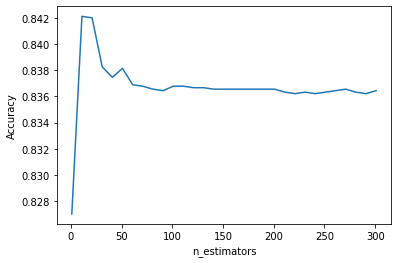

In [38]:
from matplotlib import pyplot as plt
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [39]:
df = pd.DataFrame({'n_estimators':estimator_range,'Accuracy':accuracy_scores })
df[df['Accuracy']==max(df['Accuracy'])]

,n_estimators,Accuracy
1,11,0.842113


#### max_features

In [42]:
# list of values to try for max_features
feature_range = range(1, len(X_train.columns)+1)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 5-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=11, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

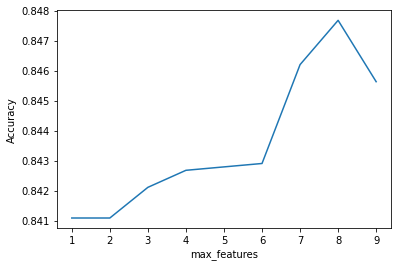

In [43]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

In [44]:
df = pd.DataFrame({'features':feature_range,'Accuracy':accuracy_scores })
df[df['Accuracy']==max(df['Accuracy'])]

,features,Accuracy
7,8,0.847673


#### max_depth

In [45]:
# list of values to try for max_depth
max_depth_range = range(1, 10)

# list to store the average Accuracy for each value of max_depth
accuracy_scores = []

# use 5-fold cross-validation with each value of max_depth (WARNING: SLOW!)
for depth in max_depth_range:
    clf = RandomForestClassifier(n_estimators=11, max_features=8, max_depth=depth, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

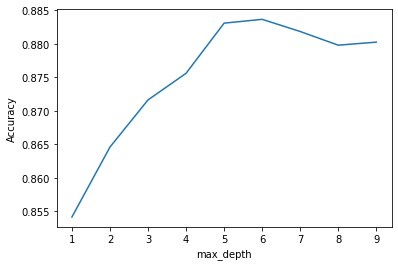

In [46]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [47]:
df = pd.DataFrame({'depth':max_depth_range,'Accuracy':accuracy_scores })
df[df['Accuracy']==max(df['Accuracy'])]

,depth,Accuracy
5,6,0.883653


#### Modelo completo

In [49]:
accuracy_scores = []

clf = RandomForestClassifier(n_estimators=11, max_features=8, max_depth=6, random_state=1, n_jobs=-1)
accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

In [50]:
accuracy_scores

[0.8836532326074199]

Se encuentran los mejores parámetros para el Random Forest, un max_feature de 8, n_estimators de 11 y la profundidad del arbol de 6. Finalmente,con estos mejores parámetros obtenemos un accuracy es de 88.36% 

# Exercise 8.7 

Using xgboost train a XGBClassifier 

Evaluate the accuracy on the testing set

In [51]:
from xgboost import XGBClassifier
from sklearn import metrics
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [52]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

(0.8989412897016361, 0.8790322580645161)

El accuracy es 87.9% usando XGBoost.

# Exercise 8.8

Using xgboost train a XGBClassifier 

Modify the parameters learning rate, gamma, colsample_bytree. Explain what each parameter means.

Evaluate the accuracy on the testing set

#### learning rate

Este parámetro es un factor de ponderación que a cada árbol para corregir los errores de los árboles anteriores, cuando se agregan al modelo. Es decir, que reduce la influencia de cadar arbol individual par que los arboles futuros mejoren el modelo. Al tener un learning rate de 1 se utulizan todos los componentes (variables) del conjunto anterior. 

In [56]:
f1 = []
acc = []
learning_rate_range = np.arange(0.01, 1, 0.01)

 
for i in learning_rate_range:
    clf = XGBClassifier(learning_rate = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1.append(metrics.f1_score(y_pred, y_test.values))
    acc.append(metrics.accuracy_score(y_pred, y_test.values))

    

Text(0, 0.5, 'Accuracy')

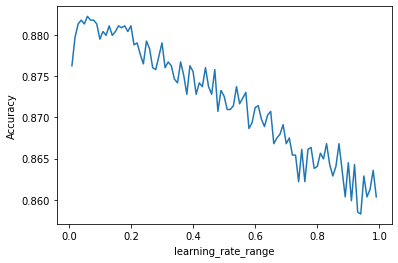

In [59]:
plt.plot(learning_rate_range, acc)
plt.xlabel('learning_rate_range')
plt.ylabel('Accuracy')

In [60]:
df = pd.DataFrame({'learning_rate_range':learning_rate_range,'Accuracy':acc})
df[df['Accuracy']==max(df['Accuracy'])]

,learning_rate_range,Accuracy
5,0.06,0.882258


#### gamma

Define la reducción de pérdida mínima necesaria para realizar una partición mayor en un nodo de hoja del árbol. A medida que gamma aumenta, el algoritmo se vuelve más conservador.

In [61]:
f1 = []
acc = []
gamma_range = np.arange(0, 10, 0.1)

 
for i in gamma_range:
    clf = XGBClassifier(learning_rate = 0.06, gamma = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1.append(metrics.f1_score(y_pred, y_test.values))
    acc.append(metrics.accuracy_score(y_pred, y_test.values))

    

Text(0, 0.5, 'Accuracy')

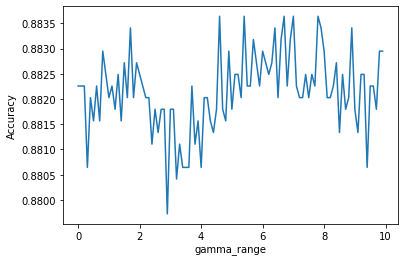

In [62]:
plt.plot(gamma_range, acc)
plt.xlabel('gamma_range')
plt.ylabel('Accuracy')

In [63]:
df = pd.DataFrame({'gamma_range':gamma_range,'Accuracy':acc})
df[df['Accuracy']==max(df['Accuracy'])]

,gamma_range,Accuracy
46,4.6,0.883641
54,5.4,0.883641
67,6.7,0.883641
70,7.0,0.883641
78,7.8,0.883641


Dado que varios gamma arrojan el mismo accuracy, escogemos el gamma más pequeño para evitar overfitting, con un valor de 4.6

#### colsample_bytree

Indica la proporción de las variables a usar (seleccionadas al azar) para entrenar cada arbol. 

In [64]:
f1 = []
acc = []
colsample_bytree_range = np.arange(0.1, 1, 0.1)

 
for i in colsample_bytree_range:
    clf = XGBClassifier(learning_rate = 0.06, gamma = 4.6, colsample_bytree = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1.append(metrics.f1_score(y_pred, y_test.values))
    acc.append(metrics.accuracy_score(y_pred, y_test.values))

    

Text(0, 0.5, 'Accuracy')

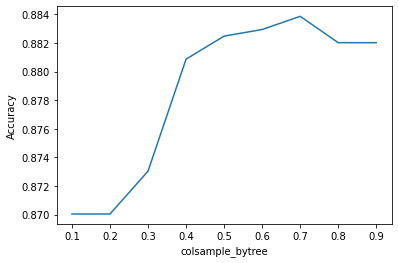

In [65]:
plt.plot(colsample_bytree_range, acc)
plt.xlabel('colsample_bytree')
plt.ylabel('Accuracy')

In [66]:
df = pd.DataFrame({'colsample_bytree_range':colsample_bytree_range,'Accuracy':acc})
df[df['Accuracy']==max(df['Accuracy'])]

,colsample_bytree_range,Accuracy
6,0.7,0.883871


Al realizar cada una las iteraciones, se sugiere tomar el 70% de las variables para construir los arboles dentro del XGBoost y obtener el mayor accuracy.

#### Modelo completo

In [67]:
acc = []


clf = XGBClassifier(learning_rate = 0.06, gamma = 4.6, colsample_bytree = 0.7)
acc.append(metrics.accuracy_score(y_pred, y_test.values).mean())


In [68]:
acc

[0.8820276497695853]

El accuracy del modelo completo con learning_rate = 0.06, gamma = 4.6, colsample_bytree = 0.7 es de 88.20%. Se observa, que al encontrar los mejores parámetros obtenemos un accuracy superior. Adicionalmente, se puede concluir que XGBoost obtiene una mejor preccisión predictiva del modelo que Random Forest, gracias a la manera de construcción de los arboles (crear y agregar árboles secuencialmente) y a la manera de combinar resultados, que a diferencia de RF no lo hacen al final del proceso sino a lo largo del entrenamiento del modelo.    